In [49]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('radprof_params_and_metrics.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.columns = ["image", "original_radprof", "orig_fitted_data", "radprof", "fitted_data", "jsd_before", "jsd_after", "param_errs"]
df

,image,original_radprof,orig_fitted_data,radprof,fitted_data,jsd_before,jsd_after,param_errs
0,SGP_reconstructed_images/ccfbta060117c.fits_74...,"[1888.16541214186, 5126.711786661539, 6877.360...","[2771.812373858105, 4685.407947215053, 6374.35...","[3123.015439638659, 8020.994065120687, 8892.00...","[3749.6114419127975, 7346.104109825911, 9015.2...",0.002750,0.001567,[2.11075011e+02 4.00878422e-02 4.34046623e-02]
1,SGP_reconstructed_images/ccfbte210072c.fits_44...,"[4008.087599305136, 10443.445501252823, 13071....","[5857.812165720905, 9316.31085416404, 12142.23...","[10720.656228221462, 23848.808411776645, 20422...","[11666.746260974729, 22480.452532164734, 21630...",0.004419,0.001389,[4.75991727e+02 2.78408589e-02 3.03922131e-02]
2,SGP_reconstructed_images/ccfbte210073c.fits_44...,"[3484.7761610216485, 9462.05161781918, 12940.9...","[5121.304350719429, 8774.391745862624, 11982.0...","[8374.606528594286, 20428.18066897794, 19093.0...","[9430.156133034892, 19013.89695214938, 20141.4...",0.006493,0.001231,[4.53355902e+02 3.10451165e-02 3.35701358e-02]
3,SGP_reconstructed_images/ccfbte210075c.fits_18...,"[3800.424784526603, 10695.077117539206, 14378....","[5485.703684905754, 9843.678478426213, 13356.4...","[10857.213476788722, 21693.876180652023, 16399...","[11147.597657742015, 21248.31619916485, 16930....",0.008445,0.000393,[2.04831018e+02 1.17806668e-02 1.28429894e-02]
4,SGP_reconstructed_images/ccfbtg160040c.fits_18...,"[3631.642924419304, 10442.0793409555, 13241.94...","[5758.586863778347, 9263.365976152312, 12015.7...","[9348.37163896676, 19726.333798845288, 16708.0...","[9913.576520430644, 18922.755478422514, 17401....",0.008264,0.002015,[3.24125891e+02 2.22910401e-02 2.43772734e-02]
...,...,...,...,...,...,...,...,...
66,SGP_reconstructed_images/ccfbyc130091c.fits_49...,"[3293.9936076487074, 9206.383190277837, 12135....","[4977.812494443306, 8348.134380765578, 11061.0...","[8065.861900143264, 19826.989832641735, 17187....","[8804.364667197664, 18886.128907283513, 17985....",0.007142,0.003052,[4.05040688e+02 2.55141036e-02 2.72912633e-02]
67,SGP_reconstructed_images/ccfbyd160060c.fits_36...,"[989.5305700663282, 2613.8447483522496, 3526.5...","[1439.8030701635873, 2400.424512598309, 3271.2...","[2135.590902998852, 4987.726645085182, 5178.47...","[2436.0870276729183, 4643.845275971866, 5272.4...",0.003669,0.001927,[1.21516190e+02 3.70764345e-02 4.04703321e-02]
68,SGP_reconstructed_images/ccfbyd160061c.fits_36...,"[1044.7660932023223, 2732.7879921212684, 3552....","[1535.6611502193593, 2461.4380359433167, 3271....","[2211.5193039008273, 5020.479684742318, 4677.5...","[2558.520251504033, 4560.249652069621, 4890.95...",0.002659,0.002622,[1.45301288e+02 4.81571047e-02 5.33161027e-02]
69,SGP_reconstructed_images/ccfbyd160063c.fits_36...,"[1002.9482371157092, 2789.859781425041, 3662.1...","[1545.9791729583428, 2514.404701539055, 3363.0...","[2174.0429388769853, 5289.285389810891, 5091.9...","[2487.9278900871423, 4894.286953642892, 5305.7...",0.003767,0.001652,[1.33010572e+02 3.65855052e-02 3.97379512e-02]


In [53]:
df.iloc[27]

image               SGP_reconstructed_images/ccfbvc310079c.fits_49...
original_radprof    [3529.9611554180156, 10070.256968984408, 13928...
orig_fitted_data    [5372.435228432909, 9296.408819400785, 12824.1...
radprof             [11583.547595753149, 24906.158438671442, 21169...
fitted_data         [12172.546453575003, 24086.100391138545, 21912...
jsd_before                                                   0.006579
jsd_after                                                    0.001501
param_errs             [3.43239762e+02 1.78582857e-02 1.93864490e-02]
Name: 27, dtype: object

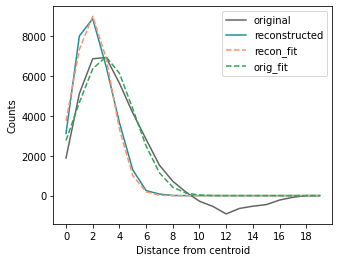

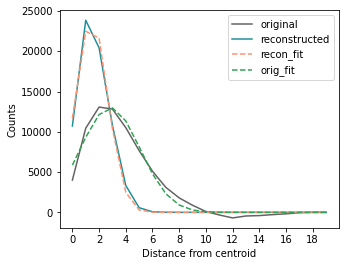

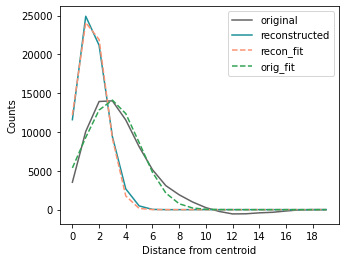

In [52]:
# df.iloc[0], df.iloc[1], df.iloc[27]

# colors = ["#7aa0c4", "#ca82e1", "#8bcd50"]

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(ast.literal_eval(df.iloc[0]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[0]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[0]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[0]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_ccfbta060117.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(ast.literal_eval(df.iloc[1]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[1]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[1]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[1]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_ccfbte210072.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(ast.literal_eval(df.iloc[27]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[27]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[27]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[27]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_ccfbvc310079.png", bbox_inches='tight', dpi=500)

In [48]:
sum(df["jsd_before"] > df["jsd_after"])

64